<h4 style="text-align: left">Topic IV:</h4>

# **<center> Machine Learning </center>**

 
***
    
*__<div style="text-align: right"> Author: Denis Sarf </div>__*
    
<br>

Install **Tensorflow** `conda install tensorflow`$^{[1]}$
***
Import all required libraries

In [2]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Neural networks.
import tensorflow.keras as keras

In [3]:
# Check tensorflow version
import tensorflow as tf; print(tf.__version__)

2.11.0


In [4]:
# Horrible hack from: https://stackoverflow.com/a/53014308
import os 
# for some reason, the following is needed to run
os.environ['KMP_DUPLICATE_LIB_OK']='True'  

In [5]:
# Identity activation function.
def identity(x):
    return x

In [6]:
# Firing a neuron.
def fire_neuron(x, w, phi):
    return phi(np.sum(x * w))

In [7]:
# Our x values - always has to have 1.0 at index 0.
x = np.array([1.0, 10.0])

# Our weights.
w = np.array([2.0, 5.0])

x, w

(array([ 1., 10.]), array([2., 5.]))

In [8]:
fire_neuron(x, w, identity)

52.0

### Data
***

In [9]:
# Real-world input values.
data_in = np.arange(1.0, 13.0, 1.0)

data_in

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [10]:
# Real-world output values.
data_out = 2.0 * data_in + np.random.normal(0.0, 1.0, len(data_in))

data_out

array([ 2.10791688,  4.12264762,  6.05325037,  9.42338387,  9.74739374,
       12.93779757, 14.19119213, 16.6495168 , 16.82307064, 21.52029899,
       23.41700715, 25.13307554])

In [11]:
# change figure size
plt.rcParams['figure.figsize'] = [20, 6]

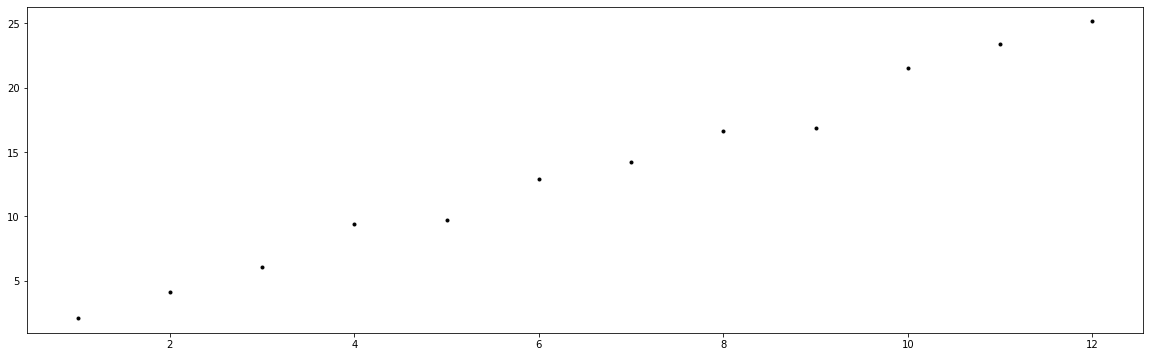

In [12]:
plt.plot(data_in, data_out, 'k.');

### Training
***

In [13]:
# An index in the data set.
i = 5

In [14]:
# Actual input/output pair from the real world.
data_in[i], data_out[i]

(6.0, 12.937797565511168)

In [15]:
# Initial weights.
w =  np.array([0.0, 5.0])

# What the neuron currently outputs for the real-world input, based on current weights.
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

30.0

In [16]:
# The goal is to create an algorithm that updates w to move the output towards the real output.
# Initial weights.
w =  np.array([0.0, 3.0])

# What the neuron could output for the real-world input, based on better weights.
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

18.0

### Using keras
***

In [19]:
# Create a new sequential neural network.
model = keras.Sequential()

In [20]:
# Add a dense layer with 64 neurons and use the relu activation function.
model.add(keras.layers.Dense(units=64, activation='relu'))

In [21]:
# Add a dense layer with 10 neurons and the softmax activation function.
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [22]:
# Compile the neural network.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [23]:
# Create a fake training data set.
x_train = np.random.normal(0.0, 1.0, (100, 64))
y_train = np.random.normal(0.5, 0.1, (100, 10))

In [24]:
# Train the neural network.
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
4/4 [==============================] - 1s 6ms/step - loss: 12.8671 - accuracy: 0.0700
Epoch 2/5
4/4 [==============================] - 0s 5ms/step - loss: 12.8282 - accuracy: 0.0800
Epoch 3/5
4/4 [==============================] - 0s 10ms/step - loss: 12.7944 - accuracy: 0.0800
Epoch 4/5
4/4 [==============================] - 0s 6ms/step - loss: 12.7688 - accuracy: 0.0800
Epoch 5/5
4/4 [==============================] - 0s 5ms/step - loss: 12.7391 - accuracy: 0.0800


#### Single Neuron in keras
***

In [25]:
# Create a new sequential neural network.
model = keras.Sequential()

In [26]:
# Add a dense layer with 1 neuron and the identity activation function.
model.add(keras.layers.Dense(units=1))

In [27]:
# Compile the neural network.
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [28]:
# Real-world input values.
data_in = np.arange(1.0, 13.0, 0.01)

# https://stackoverflow.com/a/47468541
data_in = data_in.reshape(-1, 1)

data_in

array([[ 1.  ],
       [ 1.01],
       [ 1.02],
       ...,
       [12.97],
       [12.98],
       [12.99]])

In [29]:
# Real-world output values.
data_out = 4.0 * data_in + np.random.normal(0.0, 1.0, data_in.shape)

data_out

array([[ 2.11953117],
       [ 3.8073278 ],
       [ 4.42166541],
       ...,
       [51.39193462],
       [52.55891472],
       [51.59474356]])

In [30]:
# Train the neural network.
model.fit(data_in, data_out, epochs=5, batch_size=32)

Epoch 1/5
38/38 [==============================] - 1s 2ms/step - loss: 29.1019 - accuracy: 0.0000e+00
Epoch 2/5
38/38 [==============================] - 0s 2ms/step - loss: 1.0683 - accuracy: 0.0000e+00
Epoch 3/5
38/38 [==============================] - 0s 2ms/step - loss: 1.0897 - accuracy: 0.0000e+00
Epoch 4/5
38/38 [==============================] - 0s 3ms/step - loss: 1.0669 - accuracy: 0.0000e+00
Epoch 5/5
38/38 [==============================] - 0s 2ms/step - loss: 1.0755 - accuracy: 0.0000e+00


In [31]:
# Test input values.
data_test = np.linspace(-10.0, 20.0, 1001).reshape(-1, 1)

# Feed test values into neural network.
preds = model.predict(data_test)

32/32 [==============================] - 0s 2ms/step


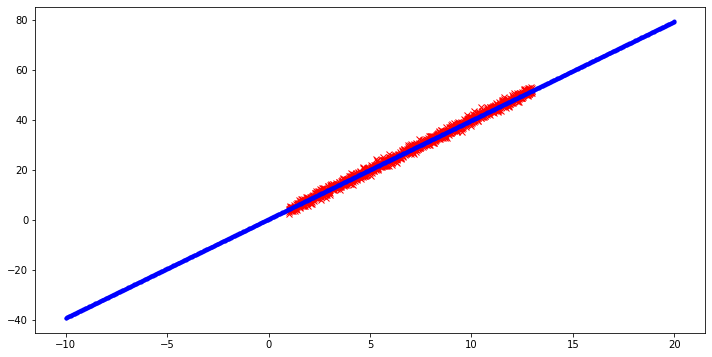

In [32]:
# Plot the values.
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the original data set.
ax.plot(data_in.flatten(), data_out.flatten(), 'rx', label='Training')

# Plot the predicted data set.
ax.plot(data_test.flatten(), preds.flatten(), 'b.', label='Predictions');

#### Experiment with an existing simple project$^{[2]}$
***

##### Preparing the dataset 
- an input layer with 8x8 = 64 neurons
- a hidden layer with 15 neurons
- an output layer with 10 neurons corresponding to the 10 digit categories.

In [33]:
# Import datasets for load and return the digits dataset [3]
from sklearn import datasets
digits = datasets.load_digits()

In [34]:
# Make 2D to 1D array
x = digits.images.reshape((len(digits.images), -1))
x.shape

(1797, 64)

The solution is to translate each target value into a vector of length 10 with a technique called one-hot encoding:
- target 0 is translated to [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
- target 1 is translated to [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
- ...
- target 9 is translated to [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [35]:
# digits.target contains the digit corresponding to each image in the dataset
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [36]:
from keras.utils import np_utils
y = np_utils.to_categorical(digits.target,10)
print(digits.target)
print(y)

[0 1 2 ... 8 9 8]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [37]:
# split our data into a training sample
split_limit=1000
x_train = x[:split_limit]
y_train = y[:split_limit]
x_test = x[split_limit:]
y_test = y[split_limit:]

The first 1000 images and labels are going to be used for training. The rest of the dataset will be used later to test the performance of our network.

##### Creation of the neural network with Keras

In [39]:
# create the input layer
# we specify that the input layer 
# should have 64 neurons, one for each pixel
# in our images.  
img_input = keras.layers.Input(shape=(64,))

# create the hidden layer
# This layer is a Dense layer, which means
# that its neurons are fully connected to the 
# neurons in the previous layer (the input layer)
# We will talk about the activation in a future post
tmp = keras.layers.Dense(15, 
                   activation='sigmoid')(img_input)

# create the output layer
# The output layer is another Dense layer.
# It must have 10 neurons, corresponding to 
# the 10 digit categories 
output = keras.layers.Dense(10, 
                      activation='softmax')(tmp)

# create the neural network from the layers
model = keras.Model(img_input, output)

# print a summary of the model
model.summary()

# =================================================

# For now, it is enough to know that regularization
# helps the neural network converge properly. 
# I've added this regularization because it is 
# performed by default in scikit-learn, 
# and because we want to be able to compare the 
# results of scikit-learn and keras. 
l2_rate = 1e-4
for layer in model.layers:
    if hasattr(layer, 'kernel_regularizer'):
        layer.kernel_regularizer = keras.regularizers.l2(l2_rate)
        layer.bias_regularizer = keras.regularizers.l2(l2_rate)
        layer.activity_regularizer = keras.regularizers.l2(l2_rate)
# =================================================

# define how the neural network will learn, 
# and compile the model. 
# models must be compiled before 
# they can be trained and used. 
# the loss, optimizer, and metrics arguments 
# will be covered in a future post. 
model.compile(loss='categorical_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9),
              metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_4 (Dense)             (None, 15)                975       
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
Total params: 1,135
Trainable params: 1,135
Non-trainable params: 0
_________________________________________________________________


In [40]:
# train the network
history = model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test),
                    batch_size=100, epochs=50)

Epoch 1/50
10/10 [==============================] - 1s 37ms/step - loss: 2.2077 - accuracy: 0.2090 - val_loss: 1.9647 - val_accuracy: 0.4316
Epoch 2/50
10/10 [==============================] - 0s 17ms/step - loss: 1.7138 - accuracy: 0.5790 - val_loss: 1.4946 - val_accuracy: 0.7315
Epoch 3/50
10/10 [==============================] - 0s 9ms/step - loss: 1.2860 - accuracy: 0.7970 - val_loss: 1.1468 - val_accuracy: 0.7905
Epoch 4/50
10/10 [==============================] - 0s 10ms/step - loss: 0.9043 - accuracy: 0.8650 - val_loss: 0.8845 - val_accuracy: 0.8356
Epoch 5/50
10/10 [==============================] - 0s 9ms/step - loss: 0.6543 - accuracy: 0.9020 - val_loss: 0.7131 - val_accuracy: 0.8243
Epoch 6/50
10/10 [==============================] - 0s 10ms/step - loss: 0.4802 - accuracy: 0.9140 - val_loss: 0.6028 - val_accuracy: 0.8394
Epoch 7/50
10/10 [==============================] - 0s 10ms/step - loss: 0.3973 - accuracy: 0.9350 - val_loss: 0.5515 - val_accuracy: 0.8595
Epoch 8/50
10/1

##### Evaluating the performance
The predictions from the neural network are evaluated for all examples in the test sample by doing

In [41]:
predictions = model.predict(x_test)
print(predictions[3]) # changed from 3 to 5

25/25 [==============================] - 0s 2ms/step
[2.1851906e-03 7.6846591e-06 8.5190630e-05 1.6968860e-04 9.6111624e-05
 9.9669594e-01 4.1816451e-04 2.0395642e-05 2.1537677e-05 2.9994510e-04]


Create a function to plot a given image, and to print the true and predicted categories

In [42]:
def plot_prediction(index):
    print('predicted probabilities:')
    print(predictions[index])
    print('predicted category', np.argmax(predictions[index]))
    print('true probabilities:')
    print(y_test[index])
    print('true category', np.argmax(y_test[index]))
    img = x_test[index].reshape(8,8)
    plt.imshow(img)

predicted probabilities:
[8.6653083e-05 1.1810600e-03 5.5571207e-05 5.4804389e-03 5.7750814e-05
 9.4852522e-02 8.2866427e-05 2.5043191e-04 1.5760650e-03 8.9637673e-01]
predicted category 9
true probabilities:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
true category 9


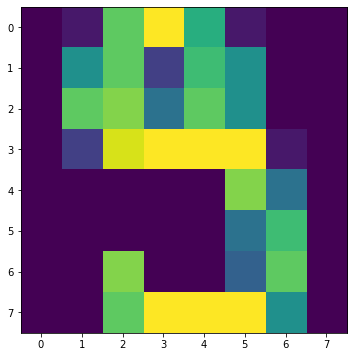

In [43]:
# Use plot_prediction(index) function to have a look at a few examples 
#(just choose a different index to look at another example).
plot_prediction(6)

Finally, let's compute the accuracy score, which is the probability to classify the digits correctly.

In [44]:
# the second argument of argmax specifies
# that we want to get argmax for each example. 
# without this argument, argmax would return 
# the largest value in the whole array,
# considering all examples
y_test_best = np.argmax(y_test,1)
print(y_test_best.shape)
predictions_best = np.argmax(predictions,1)

from sklearn.metrics import accuracy_score
accuracy_score(y_test_best, predictions_best)

(797,)


0.917189460476788

 #### The result is not deterministic, so the accuracy will vary every time we train the network. 
 We should obtain an accuracy around 90%, similar to the one we had obtained in the same conditions with scikit-learn.

## References<a class="anchor" id="References"></a>
***


[1] https://keras.io/

[2] https://thedatafrog.com/en/articles/first-neural-network-keras/

[3] https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

https://keras.io/api/utils/



## **<center>End</center>**